# Answers To Review Comments

1. It says Promising features are manually filtered by inspecting the density plots(Did you inspect all the 692/691 features manually?). Did you try T test on all these features? If so, did it filter out properly?

Yes. The function "mydistplot1()" is called in a loop with each numerical features in each iteration. The density plot for the feature under consideration is saved in the Graphs folder). Each of the plot images were inspected by me manually and I retained only plots that looks promising (i.e. less overlap between survived & died). The names of these promising features were extracted from the Graphs folder.

Yes. The T test was also done on all the shortlisted features which are promising. Only those having a P-value less than 0.001 was listed out (39 of them) in the ascending order of their P-value as significan features. Yes, the significant features with less P-value have less overlap in density plot for among survived and died groups.

2. For the promising features, also have box/violin plots on the side. Can you give one line observations on each of these promising features from these charts?

Yes. Violin plots for significant features are plotted and the observations are as follows.

'foxo1'		: The median value for survived class is sightly higher

'npnt' 		: For survived patients the distribution is right skewed for died it is left skewed

'hsd17b11'	: Here we can see a clear density deviation including different median values for both groups

'prkd1'		: This value has more density for low values among died group

'psen1'		: A higher median value for survived group is visible

'siah1'		: A slight long tail at the higher end for survived group is visible

'abcb1'		: High density in the low values for died group

'pdgfb'		: Median value is high for died group

'mmp11'		: High median value and density for died group toward right side

'folr2'		: Slightly higher median value for died group

'casp6'		: Relatively long left tail for died group

'fgf1' 		: Less overlap between densities

'hif1a'		: Multiple modes are visible for survived groups

'mlst8'		: Two modes visible for died group

'e2f2' 		: Low median value for survived group

'lama2'		: Long right tail for survived group

'sf3b1'		: Long left tail for died group

'akt1' 		: Peaky mode for survived group

'kmt2c'		: High mode value for died group

'ccnb1'		: Two modes visible in died group

'eif4e'		: Smooth distribution but long/mode visible at high end for survived group

'tsc2' 		: Peaky mode for died group

'e2f7' 		: Long right tail for died group

'tubb4b'	: Long right tail for survived group

'mapk14'	: Relatively flatter distribution for died group

'ar' 		: Smooth mutimode long right tail for survived group distribution

'ran' 		: Long right tail for survived group

'gsk3b' 	: High variance and long tail for died group

'casp8' 	: Relatively high mode for survived group distribution

'tgfbr2'	: Long left tail for died group

'aurka' 	: Long right tailed distribution for died group

'tnk2'		: Smooth density for survived group

'kit'		: Non smooth density for survived group

'pdgfra'	: High median and high variance for survived group

'syne1' 	: Long right tail for survived group

'ptk2' 		: Low variance for survived group

'mmp7' 		: Relatively flat distribution and right skewed tail for survived group

'stat5a'	: Right skewed distribution for survived group

'rps6' 		: Multimode for died group and high mode for survived group

3.Try visualizing the dataset using TSNE.

The TSNE plot has been added and experimenting the TSNE plot with various parameters are tried out. The plot shows some separation between survived and died groups along with some overlap.

4.Try some outlier detections techniques. Need not essentially remove datapoints. Just to try out the technique.

A very simple z-score based outlier detection is employed. Across each features, patients having that feature value greater than a z-score of 3 or less than a z-score of -3 was identified and displayed as heatmap.

# Data Preprocessing

### Import Libraries

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import svm
from scipy import stats
from sklearn import tree
from sklearn import metrics
from joblib import dump, load
from scipy.stats import zscore
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Read Data Set

In [2]:
# master_data = pd.read_csv('./data/METABRIC_RNA_Mutation.csv',low_memory=False)
master_data = pd.read_csv('/kaggle/input/cancerdataset/METABRIC_RNA_Mutation.csv',low_memory=False)

In [3]:
!mkdir Metrics Pretrained

In [4]:
nrows, ncols = master_data.shape
print('Number of Data points: ',nrows)
print('Number of Features: ',ncols)

Number of Data points:  1904
Number of Features:  693


In [5]:
master_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


The dataset is loaded using the Pandas library and an initial inspection is carried out. The number of data points found was 1904 and a total number of 693 attributes were found. A quick inspection of each feature name was done by me.

In [6]:
print('Names of Attributes are:\n')
for col in master_data.columns:
    print(col)

Names of Attributes are:

patient_id
age_at_diagnosis
type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
chemotherapy
pam50_+_claudin-low_subtype
cohort
er_status_measured_by_ihc
er_status
neoplasm_histologic_grade
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
hormone_therapy
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
lymph_nodes_examined_positive
mutation_count
nottingham_prognostic_index
oncotree_code
overall_survival_months
overall_survival
pr_status
radio_therapy
3-gene_classifier_subtype
tumor_size
tumor_stage
death_from_cancer
brca1
brca2
palb2
pten
tp53
atm
cdh1
chek2
nbn
nf1
stk11
bard1
mlh1
msh2
msh6
pms2
epcam
rad51c
rad51d
rad50
rb1
rbl1
rbl2
ccna1
ccnb1
cdk1
ccne1
cdk2
cdc25a
ccnd1
cdk4
cdk6
ccnd2
cdkn2a
cdkn2b
myc
cdkn1a
cdkn1b
e2f1
e2f2
e2f3
e2f4
e2f5
e2f6
e2f7
e2f8
src
jak1
jak2
stat1
stat2
stat3
stat5a
stat5b
mdm2
tp53bp1
adam10
adam17
aph1a
aph1b
arrdc1
cir1
ctbp1
ctbp2
cul1
dll1
dll3
dll4
dtx1
dtx2

In [7]:
master_data = master_data.drop(['patient_id'],axis=1)

The value counts of both of these variables were done as the next step.

In [8]:
master_data['death_from_cancer'].value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

<AxesSubplot:>

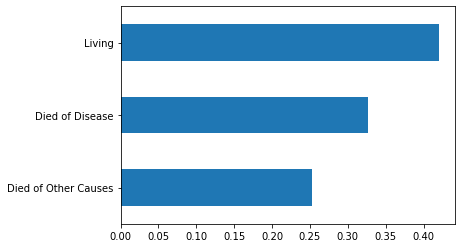

In [9]:
master_data['death_from_cancer'].value_counts(normalize=True).sort_values().plot(kind = 'barh')

In [10]:
counts = master_data['death_from_cancer'].value_counts().values
print('Percentage of each class is: ', counts*100/np.sum(counts))

Percentage of each class is:  [42.09143458 32.68523384 25.22333158]


In [11]:
binary_counts = (master_data['death_from_cancer'] !='Living').value_counts().values
print('Percentage of binary classes are: ', binary_counts*100/np.sum(binary_counts))

Percentage of binary classes are:  [57.93067227 42.06932773]


In [12]:
binary_counts = master_data['overall_survival'].value_counts()
print('Percentage of binary classes are: ', binary_counts*100/np.sum(binary_counts))

Percentage of binary classes are:  0    57.930672
1    42.069328
Name: overall_survival, dtype: float64


The target label given was death_from_cancer but upon inspecting the features another feature named overall_survival was found to be a proxy to the given target label. Only one target variable death_from_cancer/overall_survival is to be used to prevent overfitting. The feature patient_id was removed as it doesn't help in the exploratory data analysis or data modeling. If we group it across living as one class and dead as another class then both the target variables become a proxy of one another. The class distribution will be 57.93% (died) and 42.06% (survived). 

### Baseline Performance (57.9%)

A baseline classifier (a model which predicts all test points as the majority class) accuracy would be 57.9%. This has to be kept in mind when evaluating model classification performance and proposed models should have better accuracy scores.More than accuracy, we need to consider metrics like False Negatives as we are dealing with terminal disease.

## Notes

1. The dependent or predictor variable is death_from_cancer/overall_survival
2. The predictor variable is given as a 3-class (Living, Died of Disease, Died of Other Causes) categorical variable
3. Converting to binary variable: cancer_death 57%, survived 42%
4. A baseline classifier (a baseline model which predicts all test points as the majority class) accuracy would be 57%
5. More than accuracy, we need to consider metrics like False Negatives as we are dealng with terminal disease
6. Patient id need to be eliminated

### Check for missing values

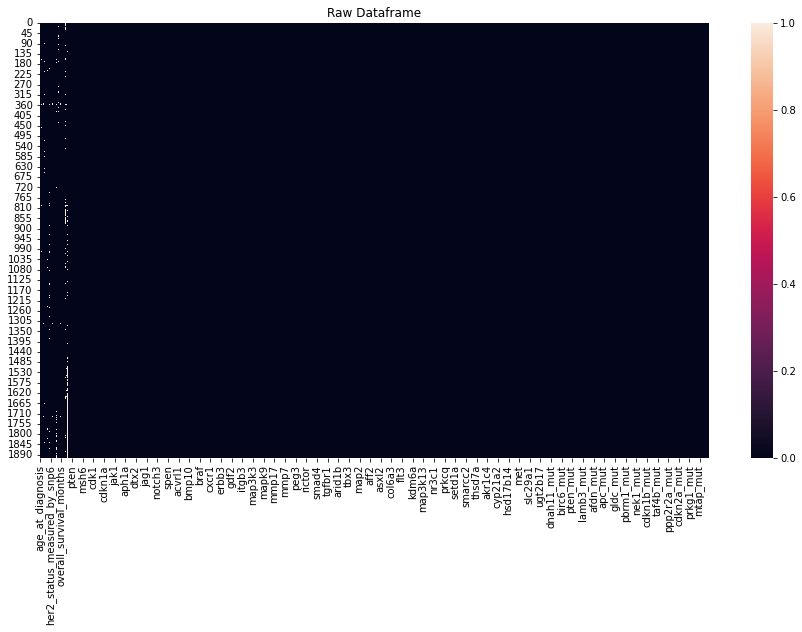

In [13]:
fig, ax = plt.subplots( figsize = (15, 8))
sns.heatmap(master_data.isnull())
ax.set_title('Raw Dataframe')
plt.show()

A heatmap of missing values shows the missing values in the dataset. The respective percentage of missing values for each feature is printed out. Most of the features have less than 5% of missing values.

In [14]:
total = master_data.isnull().sum().sort_values(ascending = False)
percent = (master_data.isnull().sum() / master_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Count_NaN', 'Percentage_Nan'])
missing_data.head(14)

,Count_NaN,Percentage_Nan
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
oncotree_code,15,0.007878


## Notes

1. 13 variables have missing values
2. Only one target variable death_from_cancer/overall_survival is to be used to prevent overfitting

In [15]:
master_data = master_data.drop(['death_from_cancer'],axis=1)

### Exploratory Data Analysis

#### Correlation Matrix

Text(0, 0.5, 'Count')

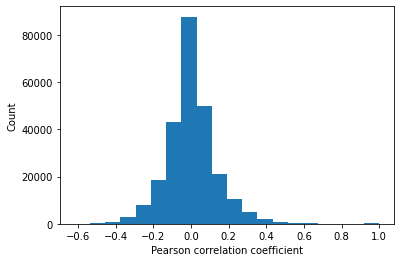

In [16]:
# Find correaltion between features
corrMat = master_data.corr().values
plt.hist(corrMat.flatten(),20)
plt.xlabel('Pearson correlation coefficient')
plt.ylabel('Count')

In [17]:
q1,q2 = np.percentile(corrMat.flatten(), [25 ,75])
print(q1,q2)

-0.06477481528930487 0.06500899484320344


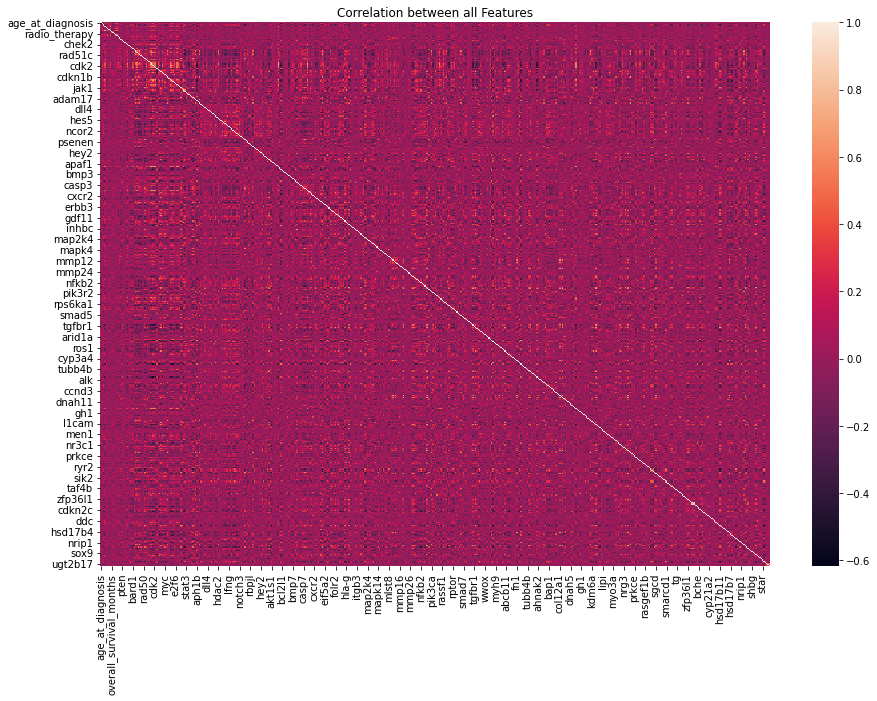

In [18]:
fig, axs = plt.subplots(figsize = (15, 10)) 
sns.heatmap(master_data.corr())
plt.title('Correlation between all Features')
plt.show()

The Pearson correlation between every combination of attributes is measured. A heatmap showing the correlation between features is generated. The inter-quartile range of correlation values shows a moderate level of positive and negative correlation from -0.065 to 0.065. Features diversly correlated with the target variable are preferred.

As a next step, to identify features which are better discriminative in terms of classifying a data point into either of the classes, each features density estimation is plotted and visualized amoung the groups

#### Automate distplot & Investigate distplot of numerical features

In [19]:
def mydistplot1(variable, data):
    labelsize = 12
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=labelsize)
    plt.rc('ytick', labelsize=labelsize)
    plt.rc('axes', labelsize=labelsize)

    (fig, axs) = plt.subplots(1, 1)
    plt.subplots_adjust(hspace=.3)
    class_1 = data[data['overall_survival'] == 1][variable]
    class_2 = data[data['overall_survival'] == 0][variable]
    sns.distplot(class_1, label='Survived', color='k', ax=axs, norm_hist=True)
    sns.distplot(class_2, label='Died', color='r', ax=axs, norm_hist=True)
    axs.set_xlabel(variable)
    axs.set_ylabel('Density')
    axs.legend(loc=2, prop={'size': 12})
    plt.savefig('./Graphs/'+'Density_'+variable+'.png',dpi=100)
    plt.close()

## Notes

1. Numerical features where less overlap between density of survived and not survived class has been identified maually

In [20]:
numericalFeats = master_data.select_dtypes('number').columns
categoricalFeats = master_data.select_dtypes('object').columns

In [21]:
# for variable in tqdm(numericalFeats):
#     mydistplot1(variable,master_data)

In [22]:
def mydistplot2(variable, data):
    labelsize = 12
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=labelsize)
    plt.rc('ytick', labelsize=labelsize)
    plt.rc('axes', labelsize=labelsize)

    (fig, axs) = plt.subplots(1, 1)
    plt.subplots_adjust(hspace=.3)
    class_1 = data[data['overall_survival'] == 1][variable]
    class_2 = data[data['overall_survival'] == 0][variable]
    sns.distplot(class_1, label='Survived', color='k', ax=axs, norm_hist=True)
    sns.distplot(class_2, label='Died', color='r', ax=axs, norm_hist=True)
    axs.set_xlabel(variable)
    axs.set_ylabel('Density')
    axs.legend(loc=2, prop={'size': 12})
    plt.show()

#### Visualize distributions manually and pick promising ones

Manuel inspection of the density plots was done. Only promising ones with less overlap between both classes (Survived and Died) were retained and listed out.

In [23]:
# promising = os.listdir('./Graphs')
# [item.split('_')[1].split('.')[0] for item in promising]

#### Visualize Distributions of promising Features: By inspecting density plots manually the features whose density plot has less overlap for survived and died class were shortlisted

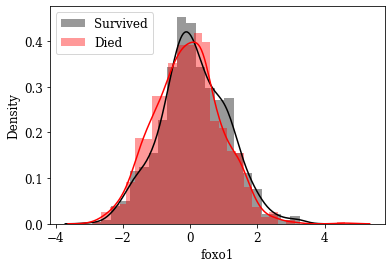

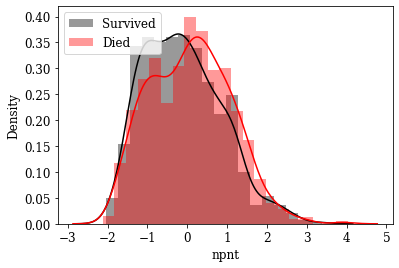

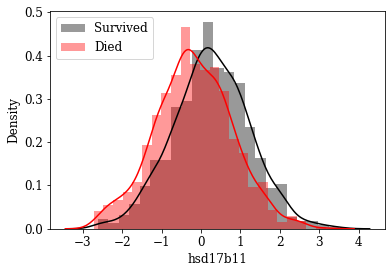

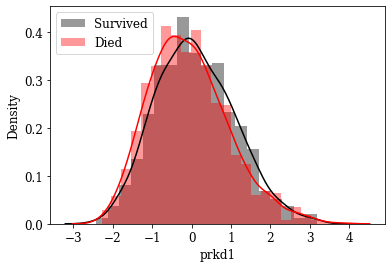

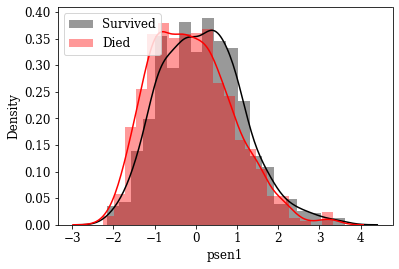

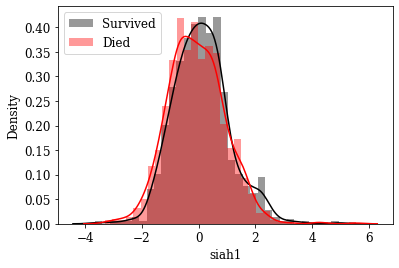

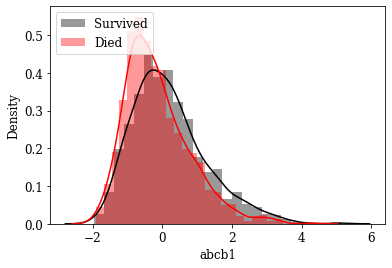

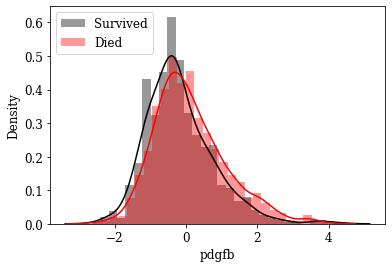

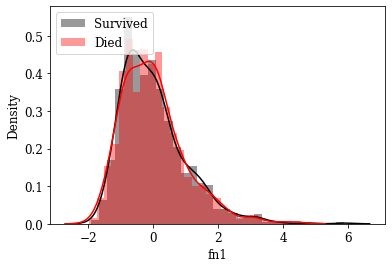

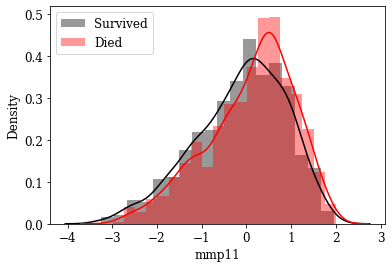

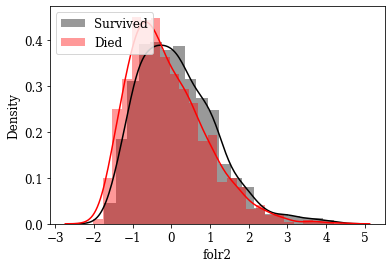

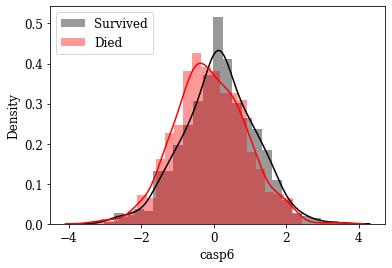

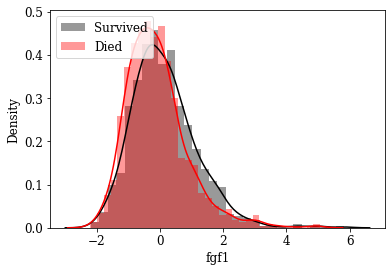

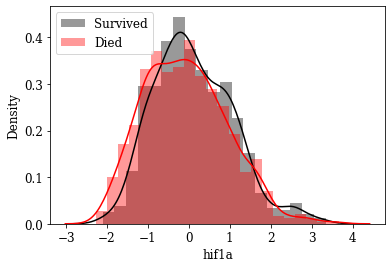

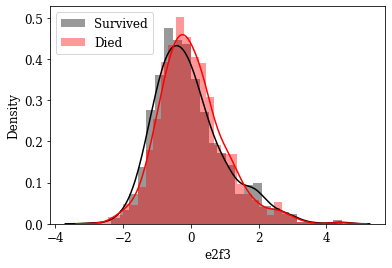

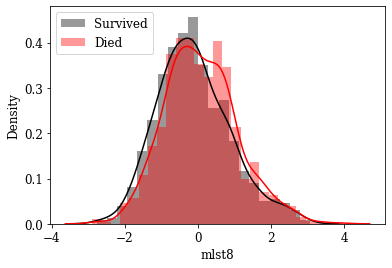

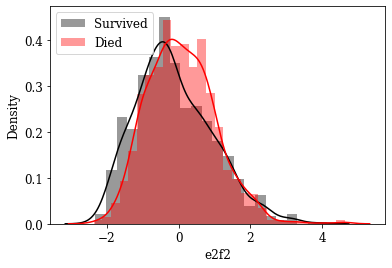

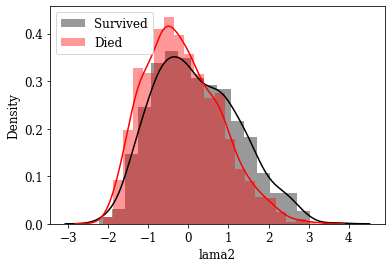

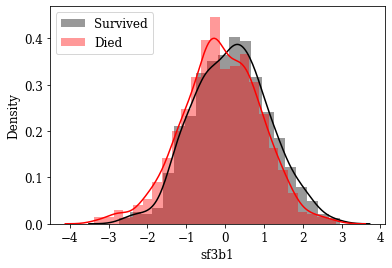

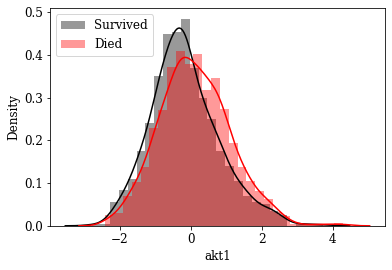

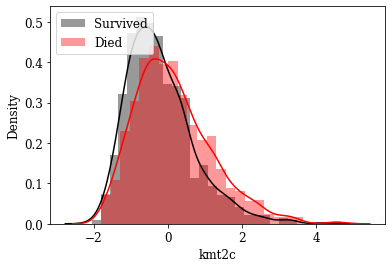

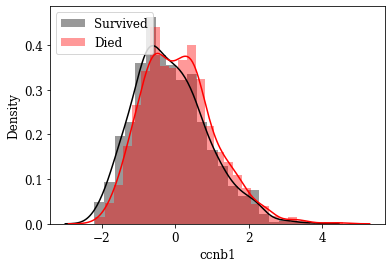

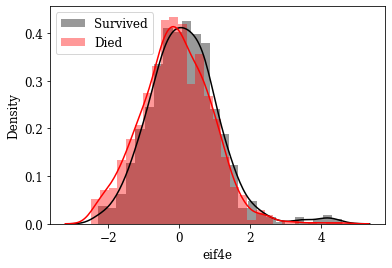

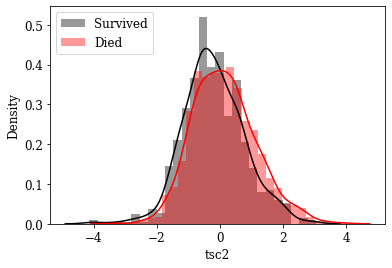

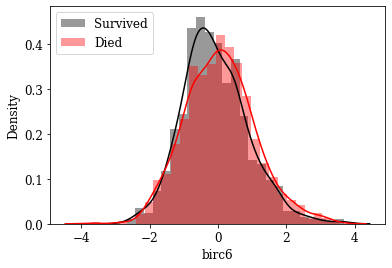

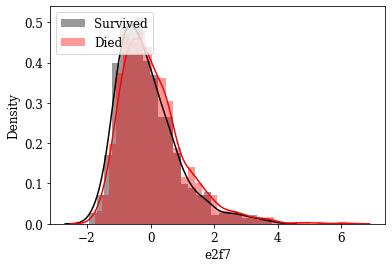

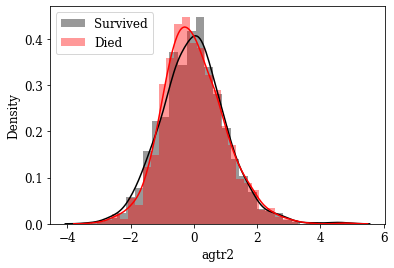

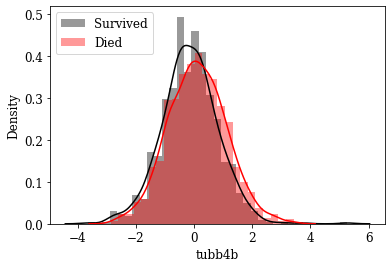

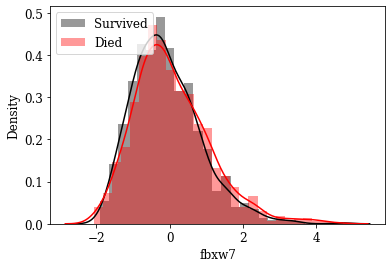

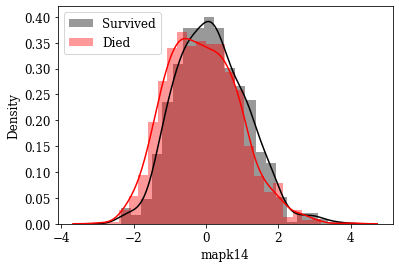

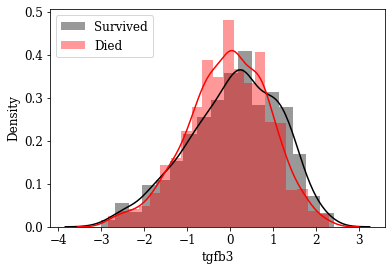

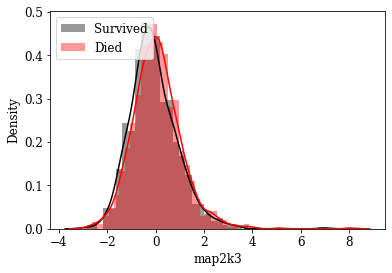

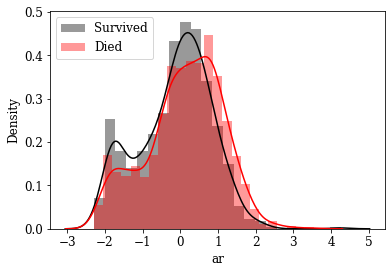

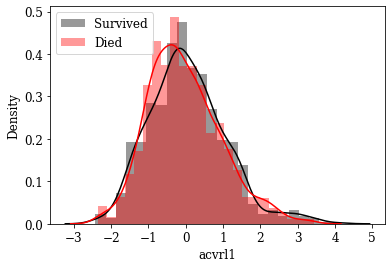

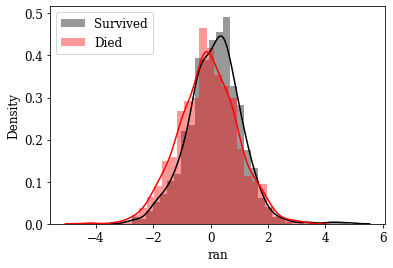

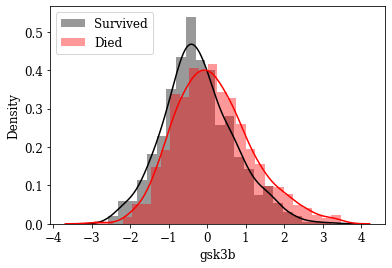

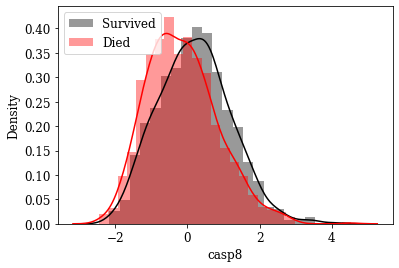

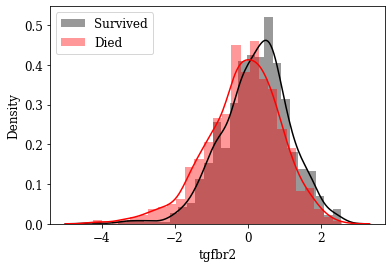

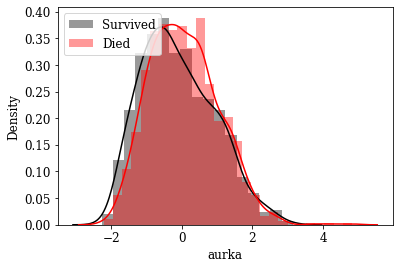

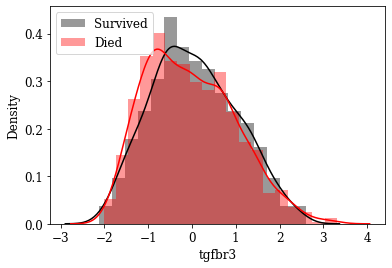

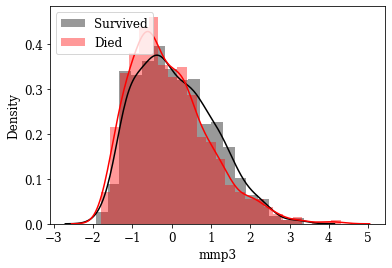

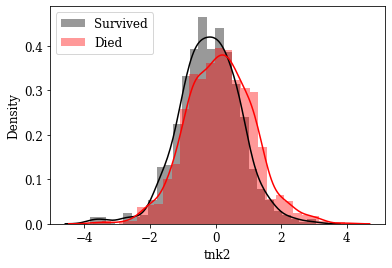

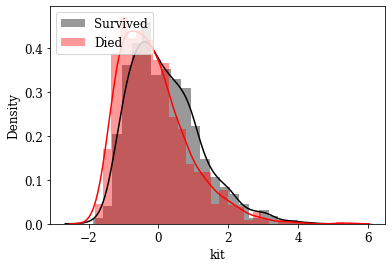

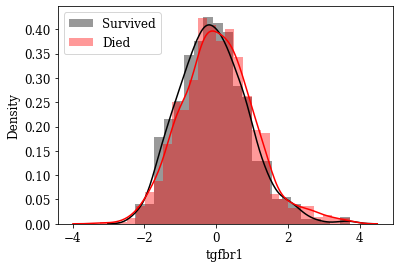

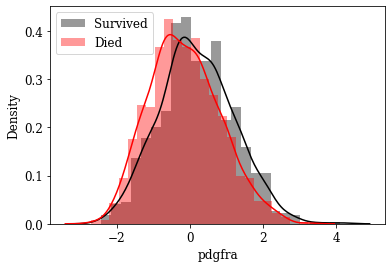

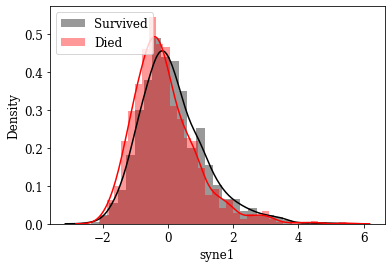

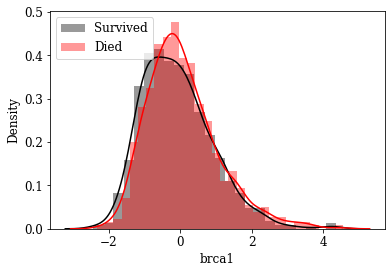

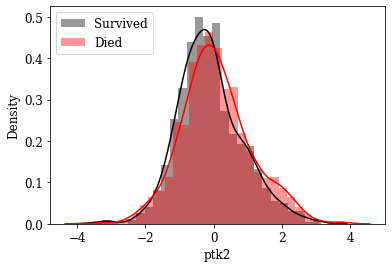

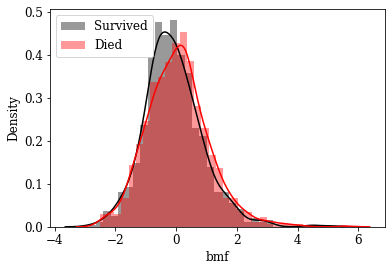

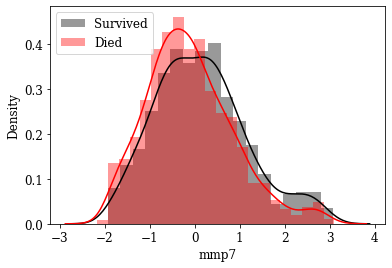

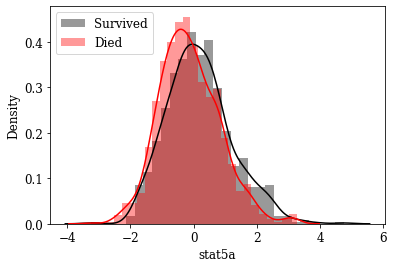

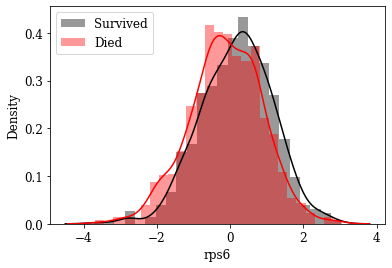

In [24]:
promising_feats = ['foxo1','npnt','hsd17b11','prkd1','psen1','siah1','abcb1','pdgfb','fn1','mmp11','folr2','casp6',\
 'fgf1','hif1a','e2f3','mlst8','e2f2','lama2','sf3b1','akt1','kmt2c','ccnb1','eif4e','tsc2','birc6',\
 'e2f7','agtr2','tubb4b','fbxw7','mapk14','tgfb3','map2k3','ar','acvrl1','ran','gsk3b','casp8','tgfbr2','aurka',\
 'tgfbr3','mmp3','tnk2','kit','tgfbr1','pdgfra','syne1','brca1','ptk2','bmf','mmp7','stat5a','rps6']

for variable in promising_feats:
    mydistplot2(variable,master_data)

#### Box plot view of few critical (based on anecdotal evidence) features

Features like Age, Tumor size, number of nodes which are likely to be a predictive attribute based on domain knowldge/anecdotal evidence were examined by plotting their box plot. There is a significant less overlap and variance difference between two classes in each of these features.

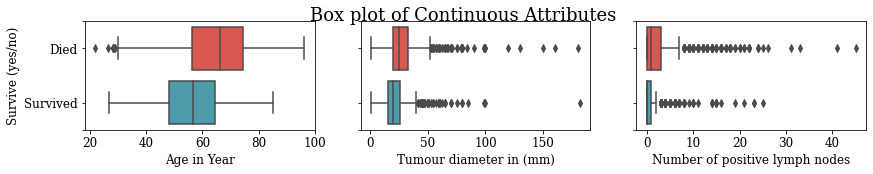

In [25]:
fig, ax = plt.subplots(ncols=3, figsize=(14,2), sharey=True)
color = 'Spectral'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]

sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=master_data, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=master_data, ax=ax[1], palette = two_colors, saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=master_data, ax=ax[2], palette = two_colors, saturation=0.90)

fig.suptitle('Box plot of Continuous Attributes', fontsize = 18)
plt.yticks([-0.5, 0, 1, 1.5], ['','Died', 'Survived',''])
ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Survive (yes/no)')

ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')

ax[2].set_xlabel('Number of positive lymph nodes')
ax[2].set_ylabel('')

plt.show()

To scientifically backup the claims/statistically validate the arguement, statistical t-test were conducted and respective p values were computed.

#### Statistical T-Test of Important Features between Survived and Died Groups
#### T-Test Assumptions

1. Independence: The observations in one sample are independent of the observations in the other sample.
2. Normality: Both samples are approximately normally distributed.
3. Homogeneity of Variances: Both samples have approximately the same variance.
4. Random Sampling

In [26]:
statDF = pd.DataFrame()

for feature in promising_feats:
    group1 = master_data[master_data['overall_survival']==1]
    group2 = master_data[master_data['overall_survival']==0]
    tstats, p_value = stats.ttest_ind(group1[feature], group2[feature])
    statDF = statDF.append({'Feature': feature,\
                            't-statistics':tstats,\
                            'P_value': p_value}, ignore_index=True)

#### Statistically Significant Features Between Survived and Died Groups for an $\alpha$ (significance value) of 0.001

#### 4. By looking at the expression, can we infer which mRNA or combination of mRNAs is related to the survival of the patient?

In [27]:
statDF['Significant'] = statDF['P_value']<0.001

In [28]:
statDF.sort_values('P_value')

,Feature,t-statistics,P_value,Significant
2,hsd17b11,9.652397,1.484763e-21,True
35,gsk3b,-8.270730,2.470631e-16,True
17,lama2,7.638929,3.447597e-14,True
20,kmt2c,-7.611309,4.243720e-14,True
36,casp8,7.449209,1.416756e-13,True
37,tgfbr2,7.359100,2.740887e-13,True
6,abcb1,7.280394,4.848640e-13,True
42,kit,7.263613,5.471716e-13,True
23,tsc2,-7.154730,1.191547e-12,True
44,pdgfra,7.057350,2.368352e-12,True


In [29]:
np.sum(statDF['Significant']==True)

39

A total of 39 statistically significant features (with an alpha level of 0.001) were foundout. They are sorted and listed out according to their p-value in ascending order. This table and features can be discussed with biologist/medical practitioners regarding its significance.

In [30]:
significantFeats = statDF[statDF['Significant']==True]['Feature'].tolist()

In [31]:
significantFeats

['foxo1',
 'npnt',
 'hsd17b11',
 'prkd1',
 'psen1',
 'siah1',
 'abcb1',
 'pdgfb',
 'mmp11',
 'folr2',
 'casp6',
 'fgf1',
 'hif1a',
 'mlst8',
 'e2f2',
 'lama2',
 'sf3b1',
 'akt1',
 'kmt2c',
 'ccnb1',
 'eif4e',
 'tsc2',
 'e2f7',
 'tubb4b',
 'mapk14',
 'ar',
 'ran',
 'gsk3b',
 'casp8',
 'tgfbr2',
 'aurka',
 'tnk2',
 'kit',
 'pdgfra',
 'syne1',
 'ptk2',
 'mmp7',
 'stat5a',
 'rps6']

### Violin Plots of Significant Features

In [32]:
def myviolinplot(feature, data):
    sns.violinplot(y=feature,\
                   x="overall_survival",\
                   data=data,\
                   palette="muted",\
                   split=True)
    plt.show()

  0%|          | 0/39 [00:00<?, ?it/s]

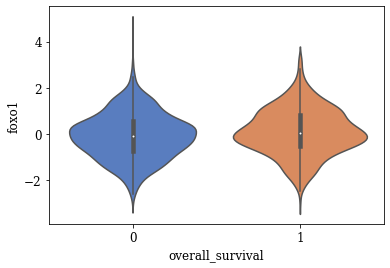

  3%|▎         | 1/39 [00:00<00:07,  4.81it/s]

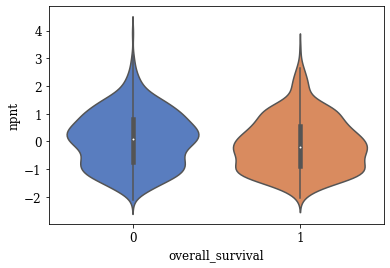

  5%|▌         | 2/39 [00:00<00:07,  4.77it/s]

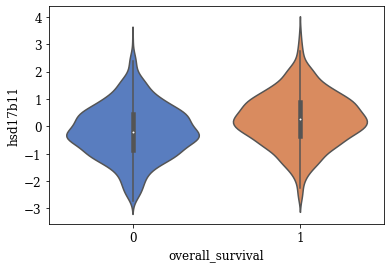

  8%|▊         | 3/39 [00:00<00:07,  4.71it/s]

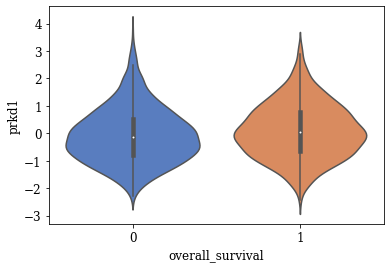

 10%|█         | 4/39 [00:00<00:07,  4.76it/s]

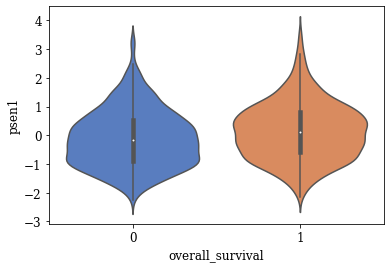

 13%|█▎        | 5/39 [00:01<00:07,  4.72it/s]

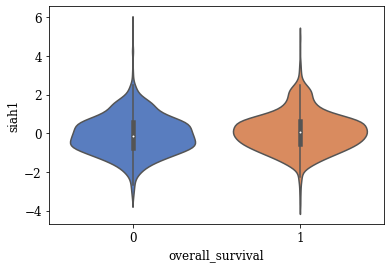

 15%|█▌        | 6/39 [00:01<00:06,  4.83it/s]

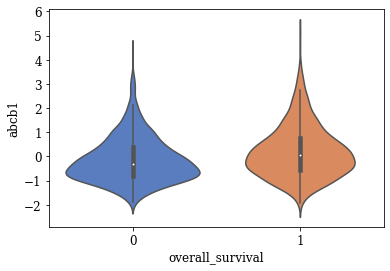

 18%|█▊        | 7/39 [00:01<00:06,  4.78it/s]

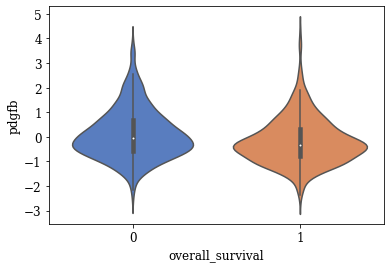

 21%|██        | 8/39 [00:01<00:06,  4.66it/s]

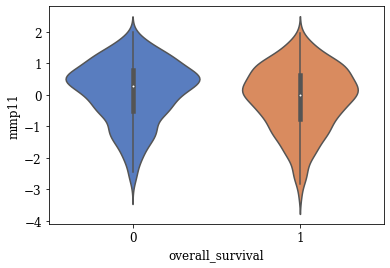

 23%|██▎       | 9/39 [00:01<00:06,  4.71it/s]

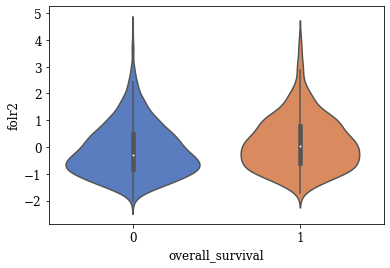

 26%|██▌       | 10/39 [00:02<00:06,  4.69it/s]

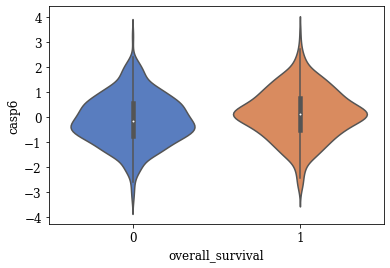

 28%|██▊       | 11/39 [00:02<00:06,  4.64it/s]

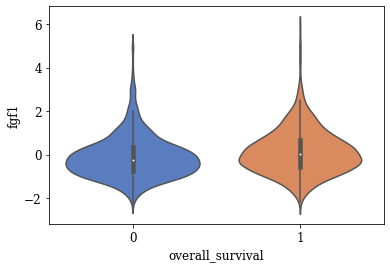

 31%|███       | 12/39 [00:02<00:05,  4.94it/s]

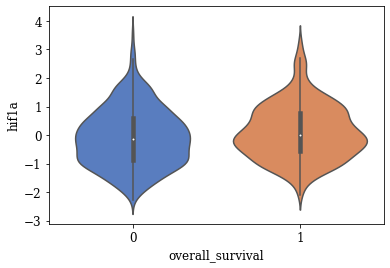

 33%|███▎      | 13/39 [00:02<00:05,  4.84it/s]

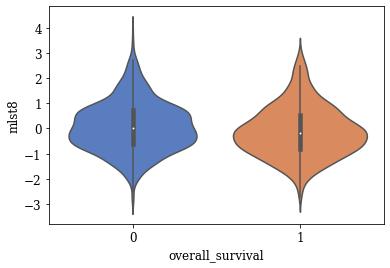

 36%|███▌      | 14/39 [00:02<00:05,  4.80it/s]

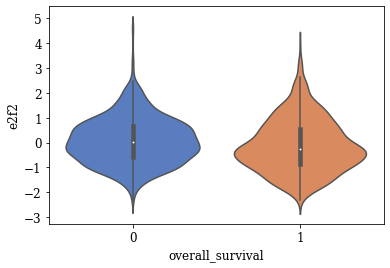

 38%|███▊      | 15/39 [00:03<00:05,  4.75it/s]

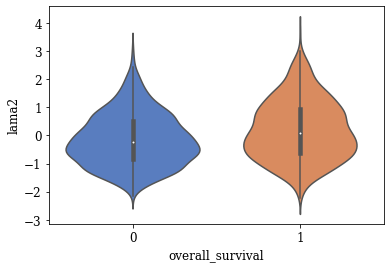

 41%|████      | 16/39 [00:03<00:04,  4.72it/s]

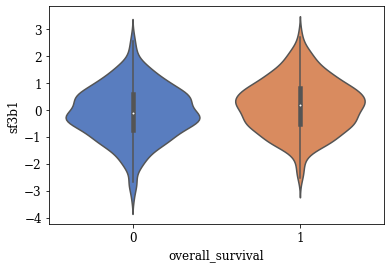

 44%|████▎     | 17/39 [00:03<00:04,  4.69it/s]

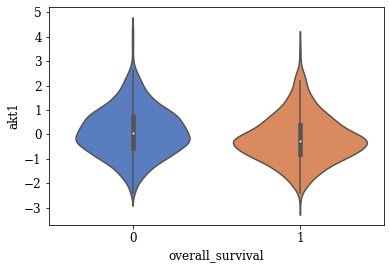

 46%|████▌     | 18/39 [00:03<00:04,  4.67it/s]

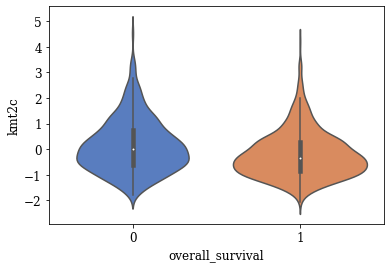

 49%|████▊     | 19/39 [00:04<00:04,  4.65it/s]

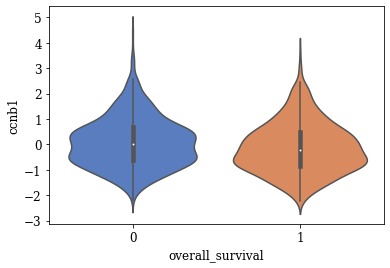

 51%|█████▏    | 20/39 [00:04<00:05,  3.52it/s]

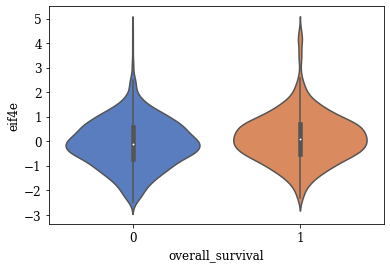

 54%|█████▍    | 21/39 [00:04<00:04,  3.83it/s]

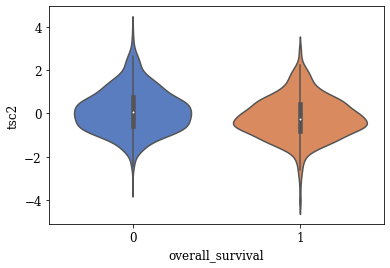

 56%|█████▋    | 22/39 [00:04<00:04,  4.15it/s]

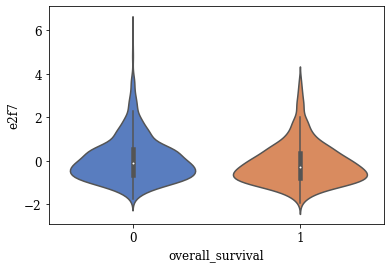

 59%|█████▉    | 23/39 [00:05<00:03,  4.39it/s]

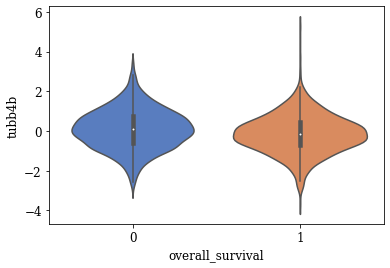

 62%|██████▏   | 24/39 [00:05<00:03,  4.48it/s]

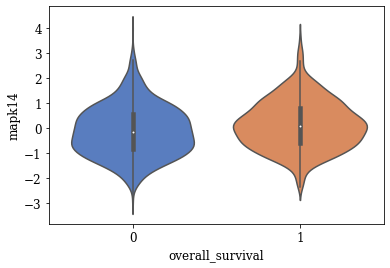

 64%|██████▍   | 25/39 [00:05<00:03,  4.59it/s]

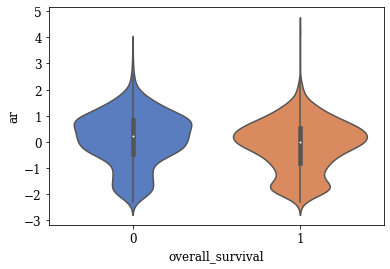

 67%|██████▋   | 26/39 [00:05<00:02,  4.64it/s]

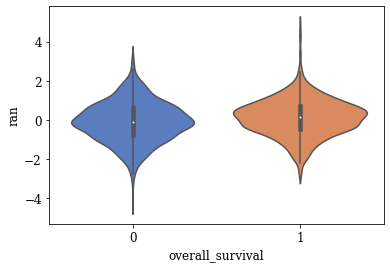

 69%|██████▉   | 27/39 [00:05<00:02,  4.80it/s]

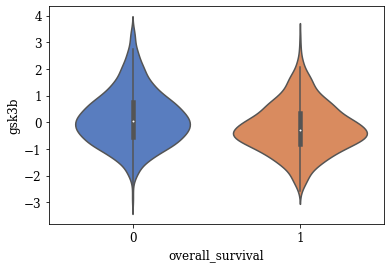

 72%|███████▏  | 28/39 [00:06<00:02,  4.81it/s]

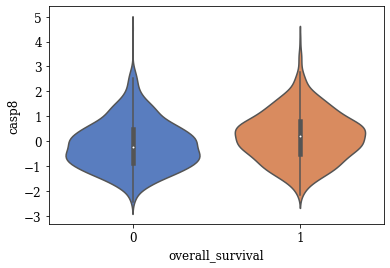

 74%|███████▍  | 29/39 [00:06<00:02,  4.75it/s]

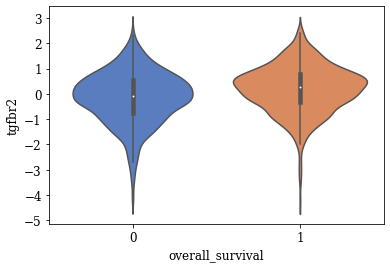

 77%|███████▋  | 30/39 [00:06<00:01,  4.72it/s]

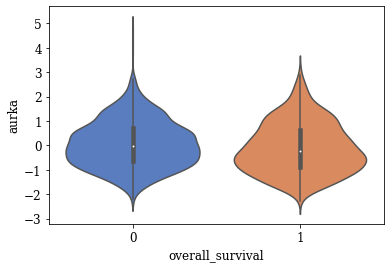

 79%|███████▉  | 31/39 [00:06<00:01,  4.72it/s]

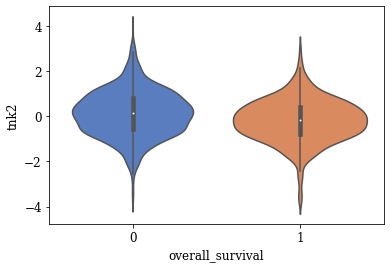

 82%|████████▏ | 32/39 [00:06<00:01,  4.84it/s]

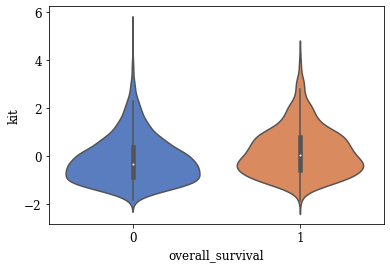

 85%|████████▍ | 33/39 [00:07<00:01,  4.91it/s]

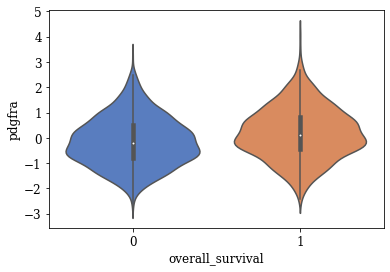

 87%|████████▋ | 34/39 [00:07<00:01,  4.83it/s]

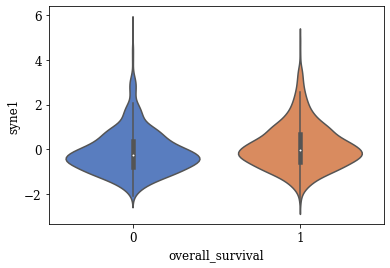

 90%|████████▉ | 35/39 [00:07<00:00,  4.93it/s]

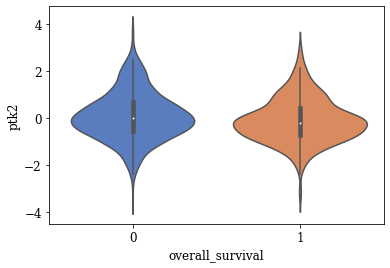

 92%|█████████▏| 36/39 [00:07<00:00,  4.95it/s]

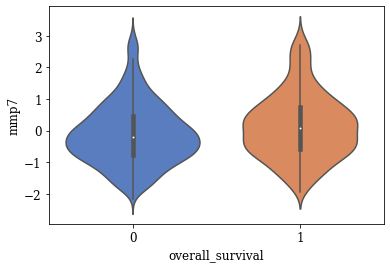

 95%|█████████▍| 37/39 [00:07<00:00,  4.97it/s]

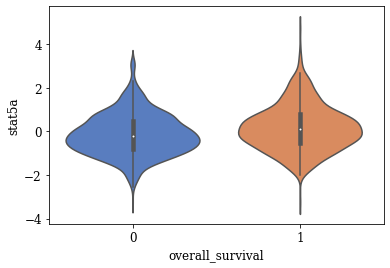

 97%|█████████▋| 38/39 [00:08<00:00,  5.03it/s]

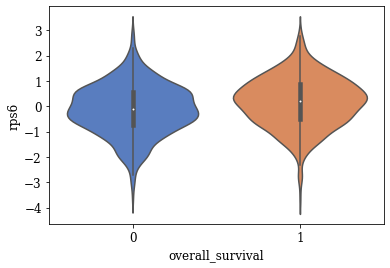

100%|██████████| 39/39 [00:08<00:00,  4.68it/s]


In [33]:
for variable in tqdm(significantFeats):
    myviolinplot(variable,master_data)

### TSNE Visualization

In [34]:
numdata = master_data[numericalFeats]

In [35]:
numdata = numdata.fillna(numdata.mean())

In [36]:
tsne = TSNE(n_components=2, perplexity=20.0, n_iter=2000,verbose=1)
z = tsne.fit_transform(numdata) 

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1904 samples in 0.002s...
[t-SNE] Computed neighbors for 1904 samples in 0.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1904
[t-SNE] Computed conditional probabilities for sample 1904 / 1904
[t-SNE] Mean sigma: 9.193650
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.009445
[t-SNE] KL divergence after 2000 iterations: 1.214419


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

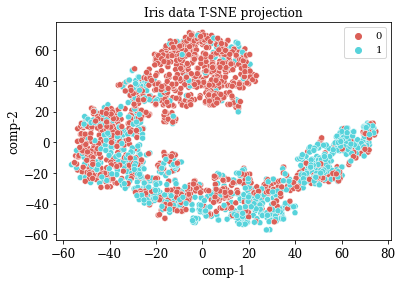

In [37]:
df = pd.DataFrame()
df["y"] = numdata['overall_survival']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection")

## Outlier Detection : Using Z-Score

#### Use simple dataframe describe to inspect outlier from mean and max values

In [38]:
numdata.describe()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.420693,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,12.978711,0.405971,1.228615,0.638185,0.486343,4.079993,4.010503,1.144492,76.334148,0.493800,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,0.000000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,61.770000,0.000000,3.000000,2.415939,1.000000,0.000000,5.000000,4.042000,115.616667,0.000000,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,1.000000,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


#### Compute Z-Scores

In [39]:
num_zscores = numdata.apply(zscore)

#### Find all cells where zscore>3 or zscore<-3

In [40]:
num_zscores_binary = num_zscores.abs()>3

In [41]:
num_zscores_binary

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1901,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


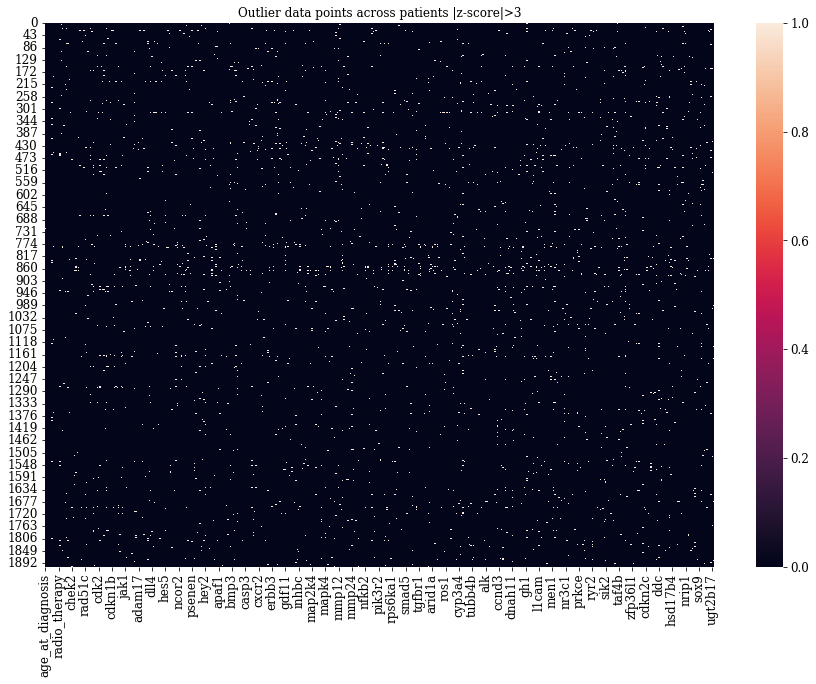

In [42]:
fig, axs = plt.subplots(figsize = (15, 10)) 
sns.heatmap(num_zscores_binary)
plt.title('Outlier data points across patients |z-score|>3')
plt.show()

In [43]:
# therapies =  ['chemotherapy','hormone_therapy','radio_therapy']

chemo = master_data[(master_data['chemotherapy']==1) & (master_data['hormone_therapy']==0) & (master_data['radio_therapy']==0)]
hormone = master_data[(master_data['chemotherapy']==0) & (master_data['hormone_therapy']==1) & (master_data['radio_therapy']==0)]
radio = master_data[(master_data['chemotherapy']==0) & (master_data['hormone_therapy']==0) & (master_data['radio_therapy']==1)]

#### 1. Which treatment (Radiotherapy, Hormonal therapy, Chemotherapy) works best for breast cancer.

In [44]:
c = chemo['overall_survival'].value_counts()
h = hormone['overall_survival'].value_counts()
r = radio['overall_survival'].value_counts()

print('Success rate of chemo:{} out of {} Trials'.format(c[1]/sum(c),sum(c)))
print('Success rate of hormone therapy:{}out of {} Trials'.format(h[1]/sum(h),sum(h)))
print('Success rate of radio therapy:{} out of {} Trials'.format(r[1]/sum(r),sum(r)))

Success rate of chemo:0.37777777777777777 out of 45 Trials
Success rate of hormone therapy:0.3333333333333333out of 405 Trials
Success rate of radio therapy:0.5219298245614035 out of 228 Trials


#### 2. Does a combination of therapy increases the chances of survival?

In [45]:
chemo_hormone = master_data[(master_data['chemotherapy']==1) & (master_data['hormone_therapy']==1) & (master_data['radio_therapy']==0)]
hormone_radio = master_data[(master_data['chemotherapy']==0) & (master_data['hormone_therapy']==1) & (master_data['radio_therapy']==1)]
chemo_radio = master_data[(master_data['chemotherapy']==1) & (master_data['hormone_therapy']==0) & (master_data['radio_therapy']==1)]

chemo_hormone_radio = master_data[(master_data['chemotherapy']==1) & (master_data['hormone_therapy']==1) & (master_data['radio_therapy']==1)]

ch = chemo_hormone['overall_survival'].value_counts()
hr = hormone_radio['overall_survival'].value_counts()
cr = chemo_radio['overall_survival'].value_counts()
rch = chemo_hormone_radio['overall_survival'].value_counts()

print('Success rate of chemo and hormone:{} out of {} Trials'.format(ch[1]/sum(ch),sum(ch)))
print('Success rate of hormone and radio therapy:{}out of {} Trials'.format(hr[1]/sum(hr),sum(hr)))
print('Success rate of chemo and radio therapy:{} out of {} Trials'.format(cr[1]/sum(cr),sum(cr)))
print('Success rate of chemo, hormone, and radio therapy:{} out of {} Trials'.format(rch[1]/sum(rch),sum(rch)))

Success rate of chemo and hormone:0.32142857142857145 out of 28 Trials
Success rate of hormone and radio therapy:0.431740614334471out of 586 Trials
Success rate of chemo and radio therapy:0.44642857142857145 out of 168 Trials
Success rate of chemo, hormone, and radio therapy:0.535483870967742 out of 155 Trials


The success rate of each treatment individually/combined is computed and along with their number of trials. Since the number of trials varies greatly across each treatment, it may be difficult to conclude which treatment works better. But in general combination of treatments seems to be popular/work better.

#### 3. Does type of breast surgery has a role in survival as cancer mutations circulate in blood cells?

In [46]:
group1 = master_data[master_data['type_of_breast_surgery']=='MASTECTOMY']
group2 = master_data[master_data['type_of_breast_surgery']=='BREAST CONSERVING']
tstats, p_value = stats.ttest_ind(group1[feature], group2[feature])
print('P-Value',p_value)
print('Is significant: ', p_value<0.01)

P-Value 0.016824539193087143
Is significant:  False


I have read that cancer appears again and the importance of liquid biopsy for early detection of reccuring of disease. Hence I framed my hypothesis that the type of breast surgery may not contribute to the survival of patient. The statistical significance test supports my arguement.

## Notes

1. Statistically significant features ($\alpha<0.001$) that desides the survival of patients has been identified using T-test
2. Manually inspecting density of plots potential features that may help in classification are identified
3. Potential 39 decisive features to do classification were quantified using T-test
4. The statistically significant features points decisive genes in cancer expressed/suppressed by their mRNA levels. These can be discussed with biologist/medical practitioners
5. Combination of therapies seems to have more success rate compared individual ones

### Performance Metrics

#### Accuracy

The simplest evaluation metric for the classifier would be accuracy. If there are
N number of predictions to be made and k of them found to be correct (including both positive and negative), the accuracy is the ratio between them. The accuracy can range from 0 to 1. The ideal value for accuracy is 1.

Accuracy = $\frac{k}{N}$

#### Confusion Matrix

Progressing from accuracy, the confusion matrix conveniently groups together the subgroup outcomes within a prediction. The problem under consideration is confined to a binary classifier. Under any circumstance, the classifier predicts a new input as positive/negative. The true class of the input could be positive/negative as well. This results in four possible combinations. A graphical representation of the same is shown in figure below.

<img src="./ConfMatStruct.png" width="350">

The four components of the confusion matrix are True Positives (TP), True Negatives (TN), False Positive (FP), False Negative (FN). TP refers to the positive predictions where the data point was actually positive. Similarly, TN represents the negative predictions where the data point was actually negative. FP & FN is the cases when a negative datapoint is predicted as the positive and positive one predicted as negative.

#### Sensitivity

When it comes to critical classification tasks like medical tests, it is important
to identify all positive cases even at the cost of FPs. Sensitivity also called
True Positive Rate (TPR) is a metric capturing this information. It is the ratio
between the number of positives identified by the classifier and the number of all
the data points which are actually positive. The equation for sensitivity is given
below. The ideal sensitivity value is 1.

$TPR = \frac{TP}{TP+FN}$

#### Specificity

Analogous to sensitivity, the metric specificity, also called True Negative Rate
(TNR) is the ratio of the number of data points identified as negative to the total
number of data points that are actually negative. The equation for specificity is
given below. TNR ranges from 0 to 1 and the ideal value is 1.

$ TNR = \frac{TN}{TN+FP}$

#### False Positive Rate (FPR)

The metric FPR, which is 1−TNR gives a measure about how likely the classifier is to misclassify a negative datapoint as positive. The equation for FPR is as follows.

$ FPR = \frac{FP}{TN+FP}$

The ideal value for the FPR is 0. In general, it is desirable to have a low FPR, however, depending on the context and application this requirement could be relaxed. For example, when it comes to life-critical medical tests, the objective is to identify all subjects having the decease although there could be some FPs.

#### Reciever Operator Characteristic (ROC) Curve

There exists a trade-off among sensitivity or TPR and FPR for every binary classifier. A highly sensitive classifier/test may flag every positive case but may result in a lot of FPs and brings down the specificity. This is because depending on an internal threshold value for any classifier the sensitivity and FPR (1-specificity) of it changes. These dynamic changes are visually represented in a Receiver Operator Characteristic (ROC) curve. In ROC, the x-axis represents FPR (1-specificity) and the y-axis represents TPR (sensitivity). A good classifier is expected to have high sensitivity and low FPR for every threshold value. An ideal ROC curve would be going from the lower left, covering upper-left as much as possible and ends at upper right. The Area Under the Curve (AUC) is
a quantitative measure to capture how good one ROC curve is. The ideal value of AUC is 1. ROC curves are useful in comparing the performance (sensitivity and FPR) of different classifiers under different threshold values.

## Modeling

In the data modeling part, three types of models are tried out including:

1. Logistic Regression
2. Decision Trees
3. Support Vector Machines

In [47]:
master_data = master_data.dropna()

In [48]:
def performanceResults(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y_actual[i] != y_hat[i]:
            FP += 1
        if y_actual[i] == y_hat[i] == 0:
            TN += 1
        if y_hat[i] == 0 and y_actual[i] != y_hat[i]:
            FN += 1
    acc = (TP + TN) / (TP + FP + TN + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    fpr = FP / (FP + TN)
    
    print ('accuracy: ', acc)
    print ('sensitivity: ', sensitivity)
    print ('specificity: ', specificity)
    print ('fpr: ', fpr)
    return acc, sensitivity, specificity, fpr

In [49]:
labelsize = 12
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)
plt.rc('axes', labelsize=labelsize)

In [50]:
y = master_data['overall_survival'].values
data = master_data.drop(['overall_survival'], axis=1)

numericalFeats = data.select_dtypes('number').columns
categoricalFeats = data.select_dtypes('object').columns

# Split Numeric and Categorical Tables
catdata = data[categoricalFeats]
numdata = data[numericalFeats]


# Scale Numerical Table
numdata_scaled = preprocessing.scale(numdata)

# One-hot Encode Categorical Table
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(catdata)
catendata = encoder.transform(catdata).toarray()

# Combine Features
X = np.concatenate((numdata_scaled, catendata), axis=1)

# Separate Train and Testing Data
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=42)

## Model Creation and Hyperparameter Tuning

In [51]:
print('Working on Logistic Regression Model')
clf_LR = LogisticRegression()
lr_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
clf_LR = GridSearchCV(clf_LR, lr_params, cv=10, scoring='roc_auc',refit = True)
clf_LR.fit(X_train, y_train)
print(clf_LR.best_params_)
dump(clf_LR, './Pretrained/Logistic_Regression.joblib')

Working on Logistic Regression Model
{'C': 0.01, 'penalty': 'l2'}


['./Pretrained/Logistic_Regression.joblib']

In [52]:
print('Working on Decision Tree Model')
clf_DT = tree.DecisionTreeClassifier()
dt_params = {'ccp_alpha': [0.1, .01, .001],'max_depth' : [5, 6, 7, 8, 9]}
clf_DT = GridSearchCV(clf_DT, dt_params, cv=10, scoring='roc_auc',refit = True)
clf_DT.fit(X_train, y_train)
print(clf_DT.best_params_)
dump(clf_DT, './Pretrained/Decision_Treee.joblib')

Working on Decision Tree Model
{'ccp_alpha': 0.01, 'max_depth': 5}


['./Pretrained/Decision_Treee.joblib']

In [53]:
print('Working on Support Vector Model')
clf_SVM = svm.SVC()
svm_params = {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001]} 
clf_SVM = GridSearchCV(clf_SVM, svm_params, cv=10, scoring='roc_auc',refit = True)
clf_SVM.fit(X_train, y_train)
print(clf_SVM.best_params_)
dump(clf_SVM, './Pretrained/Support_Vector_Machine.joblib')

Working on Support Vector Model
{'C': 1, 'gamma': 0.001}


['./Pretrained/Support_Vector_Machine.joblib']

In [54]:
print('Working on Random Forest Model')
clf_RF = RandomForestClassifier()
rf_params = {'max_depth': list(range(10, 18)),\
             'max_features': list(range(0,14)),\
             'n_estimators':[50, 100, 120]}
clf_RF = GridSearchCV(clf_RF, rf_params, cv = 10, scoring='roc_auc',refit = True)
clf_RF.fit(X_train, y_train)
print(clf_RF.best_params_)
dump(clf_RF, './Pretrained/Random_Forest.joblib')

Working on Random Forest Model
{'max_depth': 13, 'max_features': 13, 'n_estimators': 120}


['./Pretrained/Random_Forest.joblib']

In [55]:
print('Working on XGBosst Model')
clf_XGB = XGBClassifier()
xgb_params = {'gamma': [0.5, 1], 'max_depth': [2, 3, 5, 8]}
clf_XGB = GridSearchCV(clf_XGB, xgb_params, cv = 10, scoring='roc_auc',refit = True)
clf_XGB.fit(X_train, y_train)
print(clf_XGB.best_params_)
dump(clf_XGB, './Pretrained/XGBoost.joblib')

Working on XGBosst Model
{'gamma': 0.5, 'max_depth': 3}


['./Pretrained/XGBoost.joblib']

### Cross-validation

As machine learning models are subject to overfitting, cross-validation technique is employed in building the classifier. 5-fold cross-validation is performed for the dataset before calculating each performance metric. The conceptual representation of cross-validation is shown in Figure below.

<img src="./CrossVal.png" width="350">

In [56]:
y_pred_LR = clf_LR.predict(X_test)
y_pred_DT = clf_DT.predict(X_test)
y_pred_SVM = clf_SVM.predict(X_test)
y_pred_RF = clf_RF.predict(X_test)
y_pred_XGB = clf_XGB.predict(X_test)


accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
accuracy_DT = metrics.accuracy_score(y_test, y_pred_DT)
accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)


LR_scores = cross_val_score(clf_LR, X_train, y_train, cv=5)
print("'Cross-validated Accuracy LR :' %0.4f (+/- %0.4f)" % (LR_scores.mean(), LR_scores.std()))

DT_scores = cross_val_score(clf_DT, X_train, y_train, cv=5)
print("'Cross-validated Accuracy DT :' %0.4f (+/- %0.4f)" % (DT_scores.mean(), DT_scores.std()))

SVM_scores = cross_val_score(clf_SVM, X_train, y_train, cv=5)
print("'Cross-validated Accuracy SVM :' %0.4f (+/- %0.4f)" % (SVM_scores.mean(), SVM_scores.std()))

RF_scores = cross_val_score(clf_RF, X_train, y_train, cv=5)
print("'Cross-validated Accuracy RF :' %0.4f (+/- %0.4f)" % (RF_scores.mean(), RF_scores.std()))

XGB_scores = cross_val_score(clf_XGB, X_train, y_train, cv=5)
print("'Cross-validated Accuracy XGB :' %0.4f (+/- %0.4f)" % (XGB_scores.mean(), XGB_scores.std()))

'Cross-validated Accuracy LR :' 0.7601 (+/- 0.0267)
'Cross-validated Accuracy DT :' 0.7447 (+/- 0.0288)
'Cross-validated Accuracy SVM :' 0.7434 (+/- 0.0289)
'Cross-validated Accuracy RF :' 0.6454 (+/- 0.0378)
'Cross-validated Accuracy XGB :' 0.8128 (+/- 0.0212)


In [57]:
print('Performance Metrics of Logistic Regression')
PR_LR = performanceResults(y_test, y_pred_LR)
print(PR_LR)
print('\n')

print('Performance Metrics of Decision Tree')
PR_DT = performanceResults(y_test, y_pred_DT)
print(PR_DT)
print('\n')

print('Performance Metrics of SVM')
PR_SVM = performanceResults(y_test, y_pred_SVM)
print(PR_SVM)
print('\n')

print('Performance Metrics of RF')
PR_RF = performanceResults(y_test, y_pred_RF)
print(PR_RF)
print('\n')

print('Performance Metrics of XGB')
PR_XGB = performanceResults(y_test, y_pred_XGB)
print(PR_XGB)

Performance Metrics of Logistic Regression
accuracy:  0.7713414634146342
sensitivity:  0.7553956834532374
specificity:  0.783068783068783
fpr:  0.21693121693121692
(0.7713414634146342, 0.7553956834532374, 0.783068783068783, 0.21693121693121692)


Performance Metrics of Decision Tree
accuracy:  0.7378048780487805
sensitivity:  0.7050359712230215
specificity:  0.7619047619047619
fpr:  0.23809523809523808
(0.7378048780487805, 0.7050359712230215, 0.7619047619047619, 0.23809523809523808)


Performance Metrics of SVM
accuracy:  0.7835365853658537
sensitivity:  0.7122302158273381
specificity:  0.8359788359788359
fpr:  0.164021164021164
(0.7835365853658537, 0.7122302158273381, 0.8359788359788359, 0.164021164021164)


Performance Metrics of RF
accuracy:  0.698170731707317
sensitivity:  0.45323741007194246
specificity:  0.8783068783068783
fpr:  0.12169312169312169
(0.698170731707317, 0.45323741007194246, 0.8783068783068783, 0.12169312169312169)


Performance Metrics of XGB
accuracy:  0.762195121

In [58]:
# Confusion Matrix: Save Matrix of selected group
np.set_printoptions(precision=2)
class_names = ['Survived', 'Died']

# Plot confusion matrix
titles_options = [('Confusion matrix, without normalization', None),
                  ('Normalized Confusion Matrix', 'true')]

path = './Metrics/'

In [59]:
def plotConfMats(clf,clf_name):
    for (title, normalize) in titles_options:
        disp = metrics.plot_confusion_matrix(clf,\
                                             X_test,\
                                             y_test,\
                                             display_labels=class_names,\
                                             cmap=plt.cm.Blues,\
                                             normalize=normalize)
        disp.ax_.set_title(title+' ({})'.format(clf_name))
        plt.savefig(path+'{}_'.format(clf_name) + title + '.png')

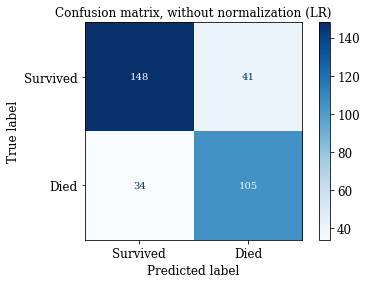

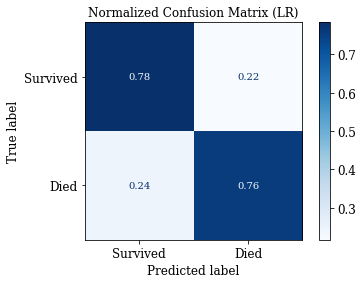

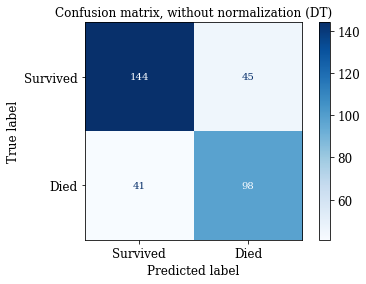

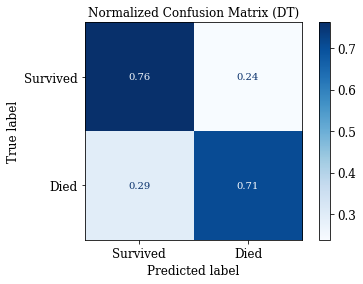

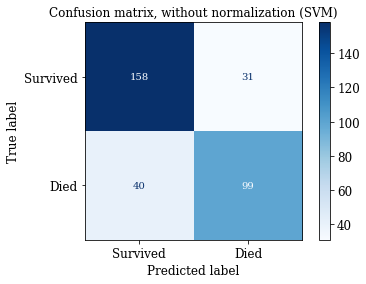

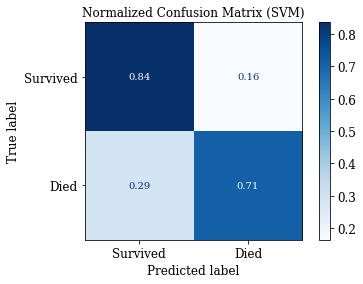

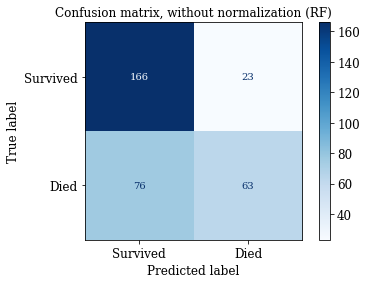

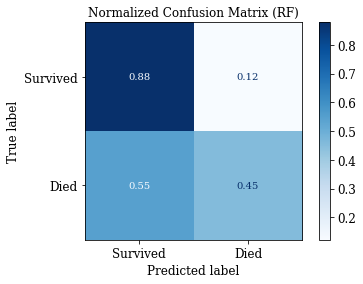

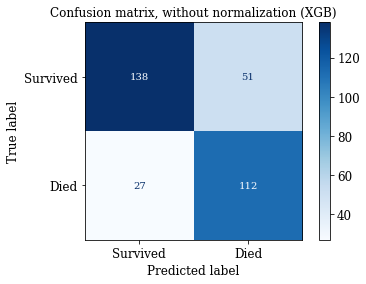

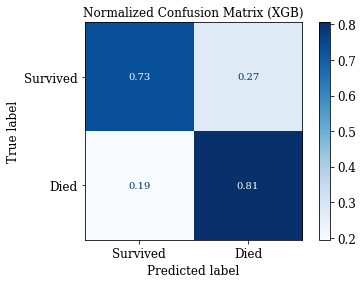

In [60]:
plotConfMats(clf_LR,'LR')
plotConfMats(clf_DT,'DT')
plotConfMats(clf_SVM,'SVM')
plotConfMats(clf_RF,'RF')
plotConfMats(clf_XGB,'XGB')

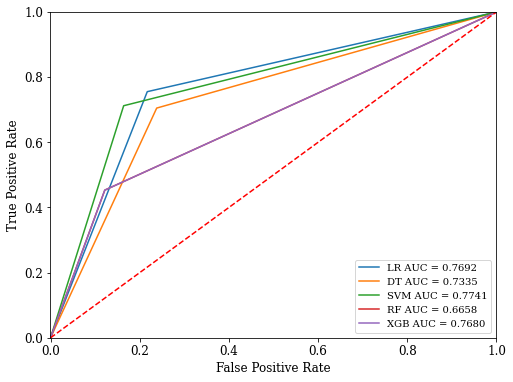

In [61]:
# Plot ROC 
fig, axs = plt.subplots(figsize = (8, 6)) 

(lrfpr, lrtpr, lrthresholds) = metrics.roc_curve(y_test, y_pred_LR)
lrroc_auc = metrics.auc(lrfpr, lrtpr)
plt.plot(lrfpr, lrtpr, label='LR AUC = %0.4f' % lrroc_auc)

(dtfpr, dttpr, dtthresholds) = metrics.roc_curve(y_test, y_pred_DT)
dtroc_auc = metrics.auc(dtfpr, dttpr)
plt.plot(dtfpr, dttpr, label='DT AUC = %0.4f' % dtroc_auc)

(svmfpr, svmtpr, svmthresholds) = metrics.roc_curve(y_test, y_pred_SVM)
svmroc_auc = metrics.auc(svmfpr, svmtpr)
plt.plot(svmfpr, svmtpr, label='SVM AUC = %0.4f' % svmroc_auc)

(rffpr, rftpr, rfthresholds) = metrics.roc_curve(y_test, y_pred_RF)
rfroc_auc = metrics.auc(rffpr, rftpr)
plt.plot(rffpr, rftpr, label='RF AUC = %0.4f' % rfroc_auc)

(xgbfpr, xgbtpr, xgbthresholds) = metrics.roc_curve(y_test, y_pred_XGB)
xgbroc_auc = metrics.auc(xgbfpr, xgbtpr)
plt.plot(rffpr, rftpr, label='XGB AUC = %0.4f' % xgbroc_auc)

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(path+'ROC.png', dpi=200)

# Results

In [62]:
AC_LR = str(np.round(LR_scores.mean(),4))+' +/- '+str(np.round(LR_scores.std(),4))
AC_DT = str(np.round(DT_scores.mean(),4))+' +/- '+str(np.round(DT_scores.std(),4))
AC_SVM = str(np.round(SVM_scores.mean(),4))+' +/- '+str(np.round(SVM_scores.std(),4)) 
AC_RF = str(np.round(RF_scores.mean(),4))+' +/- '+str(np.round(RF_scores.std(),4))
AC_XGB = str(np.round(XGB_scores.mean(),4))+' +/- '+str(np.round(XGB_scores.std(),4)) 

In [63]:
results = pd.DataFrame(columns=['Model','Accuracy (5-fold CV)','AUC','Sensitivity','Specificity','FPR'])
results['Model'] = ['LR', 'DT', 'SVM', 'RF', 'XGB']
results['Accuracy (5-fold CV)'] = [AC_LR, AC_DT, AC_SVM, AC_RF, AC_XGB]
results['AUC'] = [lrroc_auc,dtroc_auc,svmroc_auc,rfroc_auc,xgbroc_auc]
results['Sensitivity'] = [PR_LR[1], PR_DT[1], PR_SVM[1], PR_RF[1], PR_XGB[1]]
results ['Specificity'] = [PR_LR[2], PR_DT[2], PR_SVM[2], PR_RF[2], PR_XGB[2]]
results['FPR'] = [PR_LR[3], PR_DT[3], PR_SVM[3], PR_RF[3], PR_XGB[3]]

In [64]:
results

,Model,Accuracy (5-fold CV),AUC,Sensitivity,Specificity,FPR
0,LR,0.7601 +/- 0.0267,0.769232,0.755396,0.783069,0.216931
1,DT,0.7447 +/- 0.0288,0.733470,0.705036,0.761905,0.238095
2,SVM,0.7434 +/- 0.0289,0.774105,0.712230,0.835979,0.164021
3,RF,0.6454 +/- 0.0378,0.665772,0.453237,0.878307,0.121693
4,XGB,0.8128 +/- 0.0212,0.767957,0.805755,0.730159,0.269841


### Best Metrics Highlighted

| **No** | **Model** | **Accuracy (5-fold CV)** |    **AUC**   | **Sensitivity** | **Specificity** |    **FPR**   |
|:------:|:---------:|:------------------------:|:------------:|:---------------:|:---------------:|:------------:|
|      1 |        LR |        0.7601 +/- 0.0267 |     0.769232 |        0.755396 |        0.783069 |     0.216931 |
|      2 |        DT |        0.7447 +/- 0.0288 |     0.733470 |        0.705036 |        0.761905 |     0.238095 |
|      3 |       SVM |        0.7434 +/- 0.0289 | **0.774105** |        0.712230 |        0.835979 |     0.164021 |
|      4 |        RF |        0.6454 +/- 0.0378 |     0.665772 |        0.453237 |    **0.878307** | **0.121693** |
|      5 |       XGB |    **0.8128 +/- 0.0212** |     0.767957 |    **0.805755** |        0.730159 |     0.269841 |

1. The 5-fold cross-validated accuracy of XGBoost model is higher compared to other models and has more confidence.

2. The models with highest AUC are SVM model followed by Logistic regression model

3. The performance of all three models are above baseline (57.9% accuracy)

4. XGBoost model has the highest sensitivity of 0.8057

5. The AUC score difference between SVM model and XGBoost model are negligible

4. Since the context here is to identify terminally ill patients and give them better treatment, the XGboost model can considered over SVM (despite SVM having highest AUC score) at the cost of False Positives.